In [279]:
import re

def dataCleaner(dataPath):
    with open(dataPath, "r") as file:
        rawData = file.read()
    
    noSpace = re.sub(r"[ ]{1,}", "", rawData)
    dim = re.sub(r"[\n]{1,}", ",", noSpace)
    
    dim = dim.split("),(")
    dim =  [x.strip("()") for x in dim]
    
    pattern = re.compile(r"^\d+(\.\d+)?,\d+(\.\d+)?$")
    cleanDim = [x for x in dim if pattern.match(x)]
    
    coordinates = [eval(coordinate) for coordinate in cleanDim]
    #__width, __height = zip(*cordinates)
    
    return coordinates
    #return __width, __height
    

In [293]:
pichuDataPath = "../project/data/pichu.txt"
pikatchuDataPath = "../project/data/pikachu.txt"
testDataPath = "../project/data/test_points.txt"

#pichuWidth, pichuHeight = dataCleaner(pichuDataPath)
#pikatchuWidth, pikatchuHeight = dataCleaner(pikatchuDataPath)
#testWidth, testHeight = dataCleaner(testDataPath)
pichuLoc = dataCleaner(pichuDataPath)
pikatchuLoc = dataCleaner(pikatchuDataPath)
print(pichuLoc)
print(pichuLoc)


['20.11541438766307,28.701809671168824', '15.200086041781336,27.095070307714877', '17.200234546952956,27.669778220491132', '16.785685905190583,34.36654587712494', '20.8917697133121,31.480353852465935', '20.41359589938329,31.091310056669883', '22.137436541638763,26.71138648198097', '15.695510661035328,32.291267979503495', '18.375374557482164,26.634024937619284', '15.238377755504562,28.794554417576478', '16.749103798428827,34.895233506365955', '19.042842304826898,31.399997598540928', '15.212287757470909,30.569497437746463', '16.59070120549319,31.846142509898748', '20.199075502236184,33.4285192018981', '19.35953184482573,32.75999911546245', '16.763524976325574,27.290480719641042', '19.71412547100727,25.321002439040377', '21.475443653422612,28.154530480590818', '15.051990077424488,27.67740875975703', '21.446554014662464,27.109828435863264', '20.585115159905815,34.429097143350546', '17.722004132143937,33.76367626472669', '16.24383599849425,28.14677880798478', '22.65770457765425,31.554386652

AttributeError: 'list' object has no attribute 'shape'

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

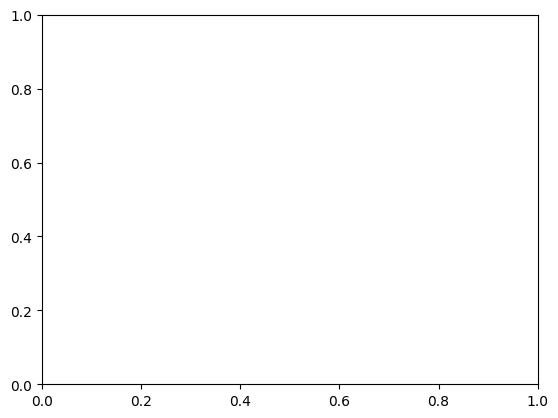

In [302]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
pichuLocA = np.array(pichuLoc)


ax.scatter(pichuLoc[:, 0], pichuLoc[:, 1], color = "red", label = "Pikachu")
#ax.scatter(pichuWidth, pichuHeight, color = "blue", label = "Pichu")

